In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Train set

In [2]:
#load data
df=pd.read_excel('Data_Train.xlsx',parse_dates=['Date_of_Journey'])

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null datetime64[ns]
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.1+ KB


In [7]:
df.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [8]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
2h 15m     135
1h 25m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      79
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h 50m      64
9h          64
5h          63
11h         62
11h 45m     62
5h 15m      62
          ... 
42h 45m      1
30h 15m      1
3h 25m       1
42h 5m       1
33h 20m      1
29h 40m      1
29h 30m      1
35h 35m      1
41h 20m      1
35h 20m      1
27h 55m      1
47h          1
27h 30m      1
4h 10m       1
37h 10m      1
29h 10m      1
19h 50m      1
31h 30m      1
5m           1
36h 25m      1
32h 20m      1
33h 45m      1
32h 55m      1
31h 50m      1
13h 35m      1
40h 20m      1
28h 30m      1
30h 10m      1
47h 40m      1
30h 25m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
# check for missing values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
df.shape

(10682, 11)

In [13]:
data=df.copy()

In [14]:
data.sort_values(by=['Date_of_Journey'],inplace=True,ascending=True)

In [15]:
data.reset_index(drop=True, inplace=True)

In [16]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,SpiceJet,2019-01-03,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515
1,Multiple carriers,2019-01-03,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528
2,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890
3,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,26h 20m,2 stops,No info,19372
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067



EDA


In [17]:
# Extracting day and month from Date_of_Journey column
data['Journey_Month']=data['Date_of_Journey'].dt.month
data['Journey_Day']=data['Date_of_Journey'].dt.day

In [18]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day
0,SpiceJet,2019-01-03,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,1,3
1,Multiple carriers,2019-01-03,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528,1,3
2,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890,1,3
3,Air India,2019-01-03,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,26h 20m,2 stops,No info,19372,1,3
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067,1,3


In [19]:
# Now drop Date_of_Journey column
data.drop('Date_of_Journey',axis=1,inplace=True)

In [20]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day
0,SpiceJet,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,1,3
1,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,00:20,13:20,13h,1 stop,No info,29528,1,3
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,08:55,15:15,6h 20m,1 stop,No info,26890,1,3
3,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,08:50,11:10 02 Mar,26h 20m,2 stops,No info,19372,1,3
4,IndiGo,Banglore,New Delhi,BLR → DEL,10:05,13:00,2h 55m,non-stop,No info,10067,1,3


In [21]:
# Extracting values from Dep_Time and Arrival_Time
data['Dep_Hour']=pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Minute']=pd.to_datetime(data['Dep_Time']).dt.minute

# Drop Dep_Time column
data.drop('Dep_Time',axis=1,inplace=True)

In [22]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute
0,SpiceJet,Kolkata,Banglore,CCU → BLR,11:30,2h 30m,non-stop,No info,5515,1,3,9,0
1,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13:20,13h,1 stop,No info,29528,1,3,0,20
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15:15,6h 20m,1 stop,No info,26890,1,3,8,55
3,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,11:10 02 Mar,26h 20m,2 stops,No info,19372,1,3,8,50
4,IndiGo,Banglore,New Delhi,BLR → DEL,13:00,2h 55m,non-stop,No info,10067,1,3,10,5


In [23]:
data['Arrival_Hour'] =data['Arrival_Time'].apply(lambda x: np.int(x[0:2]))
data['Arrival_Minute']=data['Arrival_Time'].apply(lambda x: np.int(x[3:5]))

In [24]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,SpiceJet,Kolkata,Banglore,CCU → BLR,11:30,2h 30m,non-stop,No info,5515,1,3,9,0,11,30
1,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13:20,13h,1 stop,No info,29528,1,3,0,20,13,20
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15:15,6h 20m,1 stop,No info,26890,1,3,8,55,15,15
3,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,11:10 02 Mar,26h 20m,2 stops,No info,19372,1,3,8,50,11,10
4,IndiGo,Banglore,New Delhi,BLR → DEL,13:00,2h 55m,non-stop,No info,10067,1,3,10,5,13,0


In [25]:
# Drop Arrival_Time Column
data.drop('Arrival_Time',axis=1,inplace=True)

In [26]:
data.head(50)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,5515,1,3,9,0,11,30
1,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1 stop,No info,29528,1,3,0,20,13,20
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 20m,1 stop,No info,26890,1,3,8,55,15,15
3,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,26h 20m,2 stops,No info,19372,1,3,8,50,11,10
4,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,10067,1,3,10,5,13,0
5,Air India,Banglore,New Delhi,BLR → MAA → DEL,12h 5m,1 stop,Change airports,26092,1,3,11,50,23,55
6,Air Asia,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,10715,1,3,5,50,8,40
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 15m,1 stop,No info,26890,1,3,22,50,5,5
8,Air India,Banglore,New Delhi,BLR → CCU → DEL,16h 55m,1 stop,No info,14069,1,3,5,50,22,45
9,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,14306,1,3,20,0,22,55


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# Extracting Duration Hour and Minute
for i in range(len(data)):
    if len(data['Duration'][i].split())!=2:
        if 'h' in data['Duration'][i]:
            data['Duration'][i]=data['Duration'][i].strip()+' 0m'
        else:
            data['Duration'][i]='0h '+ data['Duration'][i]
   
    
            
    

In [29]:
duration_hour=[]
duration_min=[]
for i in range(len(data)):
    duration_hour.append(int(data['Duration'][i].split(sep='h')[0]))
    duration_min.append(int(data['Duration'][i].split(sep='m')[0].split()[1]))
    
    
  

In [30]:
data['Duration_Hour']=duration_hour
data['Duration_Minute']=duration_min

In [31]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,5515,1,3,9,0,11,30,2,30
1,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h 0m,1 stop,No info,29528,1,3,0,20,13,20,13,0
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,6h 20m,1 stop,No info,26890,1,3,8,55,15,15,6,20
3,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,26h 20m,2 stops,No info,19372,1,3,8,50,11,10,26,20
4,IndiGo,Banglore,New Delhi,BLR → DEL,2h 55m,non-stop,No info,10067,1,3,10,5,13,0,2,55


In [32]:
# Drop Duration column
data.drop('Duration',axis=1,inplace=True)

In [33]:
data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,SpiceJet,Kolkata,Banglore,CCU → BLR,non-stop,No info,5515,1,3,9,0,11,30,2,30
1,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,29528,1,3,0,20,13,20,13,0
2,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,26890,1,3,8,55,15,15,6,20
3,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,2 stops,No info,19372,1,3,8,50,11,10,26,20
4,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,10067,1,3,10,5,13,0,2,55


## Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

1.**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case (eg: states (nothing is greater than anything))

2.**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [34]:
data.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
Journey_Month       int64
Journey_Day         int64
Dep_Hour            int64
Dep_Minute          int64
Arrival_Hour        int64
Arrival_Minute      int64
Duration_Hour       int64
Duration_Minute     int64
dtype: object

In [35]:
# Extracting categorical features
cat_features=[feature for  feature in data.columns if data[feature].dtypes=='O']

In [36]:
cat_features

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

### Nominal datas
**1. Airline**

In [37]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

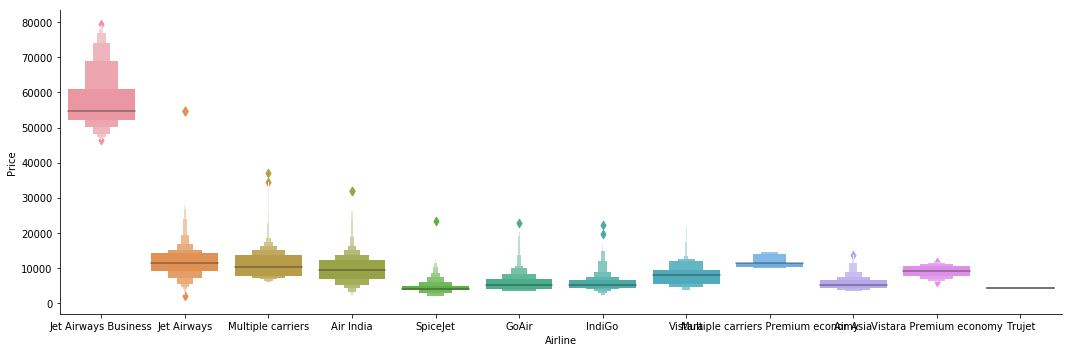

In [38]:
# plotting Airlines against Price
exercise = data.sort_values('Price',ascending=False)
sns.catplot(x='Airline', y="Price", data=exercise,kind='boxen',height=5,aspect=3)

In [39]:
data.groupby('Airline').agg({'Price': ['mean', 'median']})

Price       
                                           mean median
Airline                                               
Air Asia                            5590.260188   5162
Air India                           9612.427756   9443
GoAir                               5861.056701   5135
IndiGo                              5673.682903   5000
Jet Airways                        11643.923357  11467
Jet Airways Business               58358.666667  54747
Multiple carriers                  10902.678094  10197
Multiple carriers Premium economy  11418.846154  11269
SpiceJet                            4338.284841   3873
Trujet                              4140.000000   4140
Vistara                             7796.348643   7980
Vistara Premium economy             8962.333333   9125

In [40]:
# As Airline is nominal data, applying onehot encoding
Airline=pd.get_dummies(data['Airline'],drop_first=True)
Airline.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy'],
      dtype='object')

In [41]:
Airline=Airline.rename(columns={'Air India':'Air_India',
                                'Jet Airways':'Jet_Airways',
                                'Jet Airways Business':'Jet_Airways_Business',
                                'Multiple carriers':'Multiple_carriers',
                                'Multiple carriers Premium economy':'Multiple_carriers_Premium_economy',
                                'Vistara Premium economy':'Vistara_Premium_economy'
                                })

In [42]:
Airline.head()

,Air_India,GoAir,IndiGo,Jet_Airways,Jet_Airways_Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy
0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


**2.Source**

In [43]:
data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

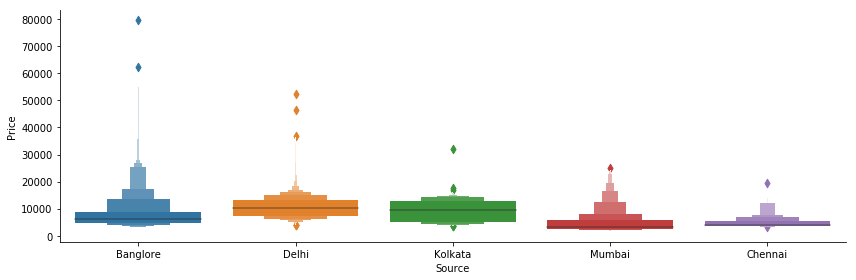

In [44]:
sns.catplot(x='Source',y='Price',data=data.sort_values('Price',ascending=False),kind='boxen',height=4,aspect=3)

In [45]:
#applying onehotencoding
source=pd.get_dummies(data['Source'],drop_first=True)

In [46]:
source.columns

Index(['Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype='object')

In [47]:
source=source.rename(columns={'Chennai':'Source_Chennai',
                              'Delhi':'Source_Delhi',
                             'Kolkata':'Source_Kolkata',
                             'Mumbai':'Source_Mumbai'})

In [48]:
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0
1,0,1,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


**3.Destination**

In [49]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [50]:
destination=pd.get_dummies(data['Destination'],drop_first=True)

In [51]:
destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [52]:
destination=destination.rename(columns={'Cochin':'Destination_Cochin',
                                       'Delhi':'Destination_Delhi',
                                       'Hyderabad':'Destination_Hyderabad',
                                       'Kolkata':'Destination_Kolkata',
                                       'New Delhi':'Destination_New_Delhi'})

In [53]:
destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,0,0,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [54]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
Red-eye flight                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [55]:
# As Route and Total_stops are doing the same thing we can drop Route column
# Additional_Info gives no useful information. so we can drop it
data.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [56]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,SpiceJet,Kolkata,Banglore,non-stop,5515,1,3,9,0,11,30,2,30
1,Multiple carriers,Delhi,Cochin,1 stop,29528,1,3,0,20,13,20,13,0
2,Jet Airways,Banglore,New Delhi,1 stop,26890,1,3,8,55,15,15,6,20
3,Air India,Banglore,New Delhi,2 stops,19372,1,3,8,50,11,10,26,20
4,IndiGo,Banglore,New Delhi,non-stop,10067,1,3,10,5,13,0,2,55


### Oridinal datas
**1.Total_Stops**

In [57]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [58]:
data.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [59]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute
0,SpiceJet,Kolkata,Banglore,0,5515,1,3,9,0,11,30,2,30
1,Multiple carriers,Delhi,Cochin,1,29528,1,3,0,20,13,20,13,0
2,Jet Airways,Banglore,New Delhi,1,26890,1,3,8,55,15,15,6,20
3,Air India,Banglore,New Delhi,2,19372,1,3,8,50,11,10,26,20
4,IndiGo,Banglore,New Delhi,0,10067,1,3,10,5,13,0,2,55


In [60]:

data_train=pd.concat([data,Airline,source,destination],axis=1)

In [61]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air_India,GoAir,IndiGo,Jet_Airways,Jet_Airways_Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,SpiceJet,Kolkata,Banglore,0,5515,1,3,9,0,11,30,2,30,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,Multiple carriers,Delhi,Cochin,1,29528,1,3,0,20,13,20,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,Jet Airways,Banglore,New Delhi,1,26890,1,3,8,55,15,15,6,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Air India,Banglore,New Delhi,2,19372,1,3,8,50,11,10,26,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,IndiGo,Banglore,New Delhi,0,10067,1,3,10,5,13,0,2,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [62]:
# drop columns Airline,Source,Destination
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [63]:
data_train.head()

,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air_India,GoAir,IndiGo,Jet_Airways,Jet_Airways_Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,0,5515,1,3,9,0,11,30,2,30,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,1,29528,1,3,0,20,13,20,13,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,1,26890,1,3,8,55,15,15,6,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,19372,1,3,8,50,11,10,26,20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,10067,1,3,10,5,13,0,2,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [64]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Month', 'Journey_Day', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hour',
       'Duration_Minute', 'Air_India', 'GoAir', 'IndiGo', 'Jet_Airways',
       'Jet_Airways_Business', 'Multiple_carriers',
       'Multiple_carriers_Premium_economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara_Premium_economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New_Delhi'],
      dtype='object')

In [65]:
# rearranging columns
data_train=data_train[['Journey_Month', 'Journey_Day', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hour',
       'Duration_Minute', 'Air_India', 'GoAir', 'IndiGo', 'Jet_Airways',
       'Jet_Airways_Business', 'Multiple_carriers',
       'Multiple_carriers_Premium_economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara_Premium_economy','Total_Stops','Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New_Delhi','Price']]

In [66]:
data_train.head()

,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air_India,GoAir,IndiGo,Jet_Airways,Jet_Airways_Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy,Total_Stops,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi,Price
0,1,3,9,0,11,30,2,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,5515
1,1,3,0,20,13,20,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,29528
2,1,3,8,55,15,15,6,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,26890
3,1,3,8,50,11,10,26,20,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,19372
4,1,3,10,5,13,0,2,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10067


## Test set

In [67]:
df1=pd.read_excel('Test_set.xlsx',parse_dates=['Date_of_Journey'])

In [68]:
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,2019-12-05,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


**EDA**

In [69]:
df1.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [70]:
# Extracting day and month from Date_of_Journey column
df1['Journey_Month']=df1['Date_of_Journey'].dt.month
df1['Journey_Day']=df1['Date_of_Journey'].dt.day

In [71]:
df1.drop('Date_of_Journey',axis=1,inplace=True)

In [72]:
# Extracting values from Dep_Time and Arrival_Time
df1['Dep_Hour']=pd.to_datetime(df1['Dep_Time']).dt.hour
df1['Dep_Minute']=pd.to_datetime(df1['Dep_Time']).dt.minute

# Drop Dep_Time column
df1.drop('Dep_Time',axis=1,inplace=True)

In [73]:
df1['Arrival_Hour'] =df1['Arrival_Time'].apply(lambda x: np.int(x[0:2]))
df1['Arrival_Minute']=df1['Arrival_Time'].apply(lambda x: np.int(x[3:5]))
df1.drop('Arrival_Time',axis=1,inplace=True)

In [74]:
# Extracting Duration Hour and Minute
for i in range(len(df1)):
    if len(df1['Duration'][i].split())!=2:
        if 'h' in df1['Duration'][i]:
            df1['Duration'][i]=df1['Duration'][i].strip()+' 0m'
        else:
            df1['Duration'][i]='0h '+ df1['Duration'][i]
            
            
            
            
duration_hour=[]
duration_min=[]
for i in range(len(df1)):
    duration_hour.append(int(df1['Duration'][i].split(sep='h')[0]))
    duration_min.append(int(df1['Duration'][i].split(sep='m')[0].split()[1]))
            


In [75]:
df1['Duration_Hour']=duration_hour
df1['Duration_Minute']=duration_min
# Drop Duration column
df1.drop('Duration',axis=1,inplace=True)

In [76]:
Airline=pd.get_dummies(data['Airline'],drop_first=True)
Airline=Airline.rename(columns={'Air India':'Air_India',
                                'Jet Airways':'Jet_Airways',
                                'Jet Airways Business':'Jet_Airways_Business',
                                'Multiple carriers':'Multiple_carriers',
                                'Multiple carriers Premium economy':'Multiple_carriers_Premium_economy',
                                'Vistara Premium economy':'Vistara_Premium_economy'
                                })
source=pd.get_dummies(data['Source'],drop_first=True)
source=source.rename(columns={'Chennai':'Source_Chennai',
                              'Delhi':'Source_Delhi',
                             'Kolkata':'Source_Kolkata',
                             'Mumbai':'Source_Mumbai'})
destination=pd.get_dummies(data['Destination'],drop_first=True)
destination=destination.rename(columns={'Cochin':'Destination_Cochin',
                                       'Delhi':'Destination_Delhi',
                                       'Hyderabad':'Destination_Hyderabad',
                                       'Kolkata':'Destination_Kolkata',
                                       'New Delhi':'Destination_New_Delhi'})

In [77]:
df1.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)

In [78]:
data_test=pd.concat([df1,Airline,source,destination],axis=1)

In [79]:
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [80]:
data_test=data_test[['Journey_Month', 'Journey_Day', 'Dep_Hour',
       'Dep_Minute', 'Arrival_Hour', 'Arrival_Minute', 'Duration_Hour',
       'Duration_Minute', 'Air_India', 'GoAir', 'IndiGo', 'Jet_Airways',
       'Jet_Airways_Business', 'Multiple_carriers',
       'Multiple_carriers_Premium_economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara_Premium_economy','Total_Stops','Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New_Delhi']]

In [81]:
data_test.head()

,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air_India,GoAir,IndiGo,Jet_Airways,Jet_Airways_Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy,Total_Stops,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,6.0,6.0,17.0,30.0,4.0,25.0,10.0,55.0,0,0,0,0,0,0,0,1,0,0,0,1.0,0,0,1,0,0,0,0,0,0
1,12.0,5.0,6.0,20.0,10.0,20.0,4.0,0.0,0,0,0,0,0,1,0,0,0,0,0,1.0,0,1,0,0,1,0,0,0,0
2,5.0,21.0,19.0,15.0,19.0,0.0,23.0,45.0,0,0,0,1,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,1
3,5.0,21.0,8.0,0.0,21.0,0.0,13.0,0.0,1,0,0,0,0,0,0,0,0,0,0,1.0,0,0,0,0,0,0,0,0,1
4,6.0,24.0,23.0,55.0,2.0,45.0,2.0,50.0,0,0,1,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,1


## Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**

**feature_importance_**

**SelectKBest**

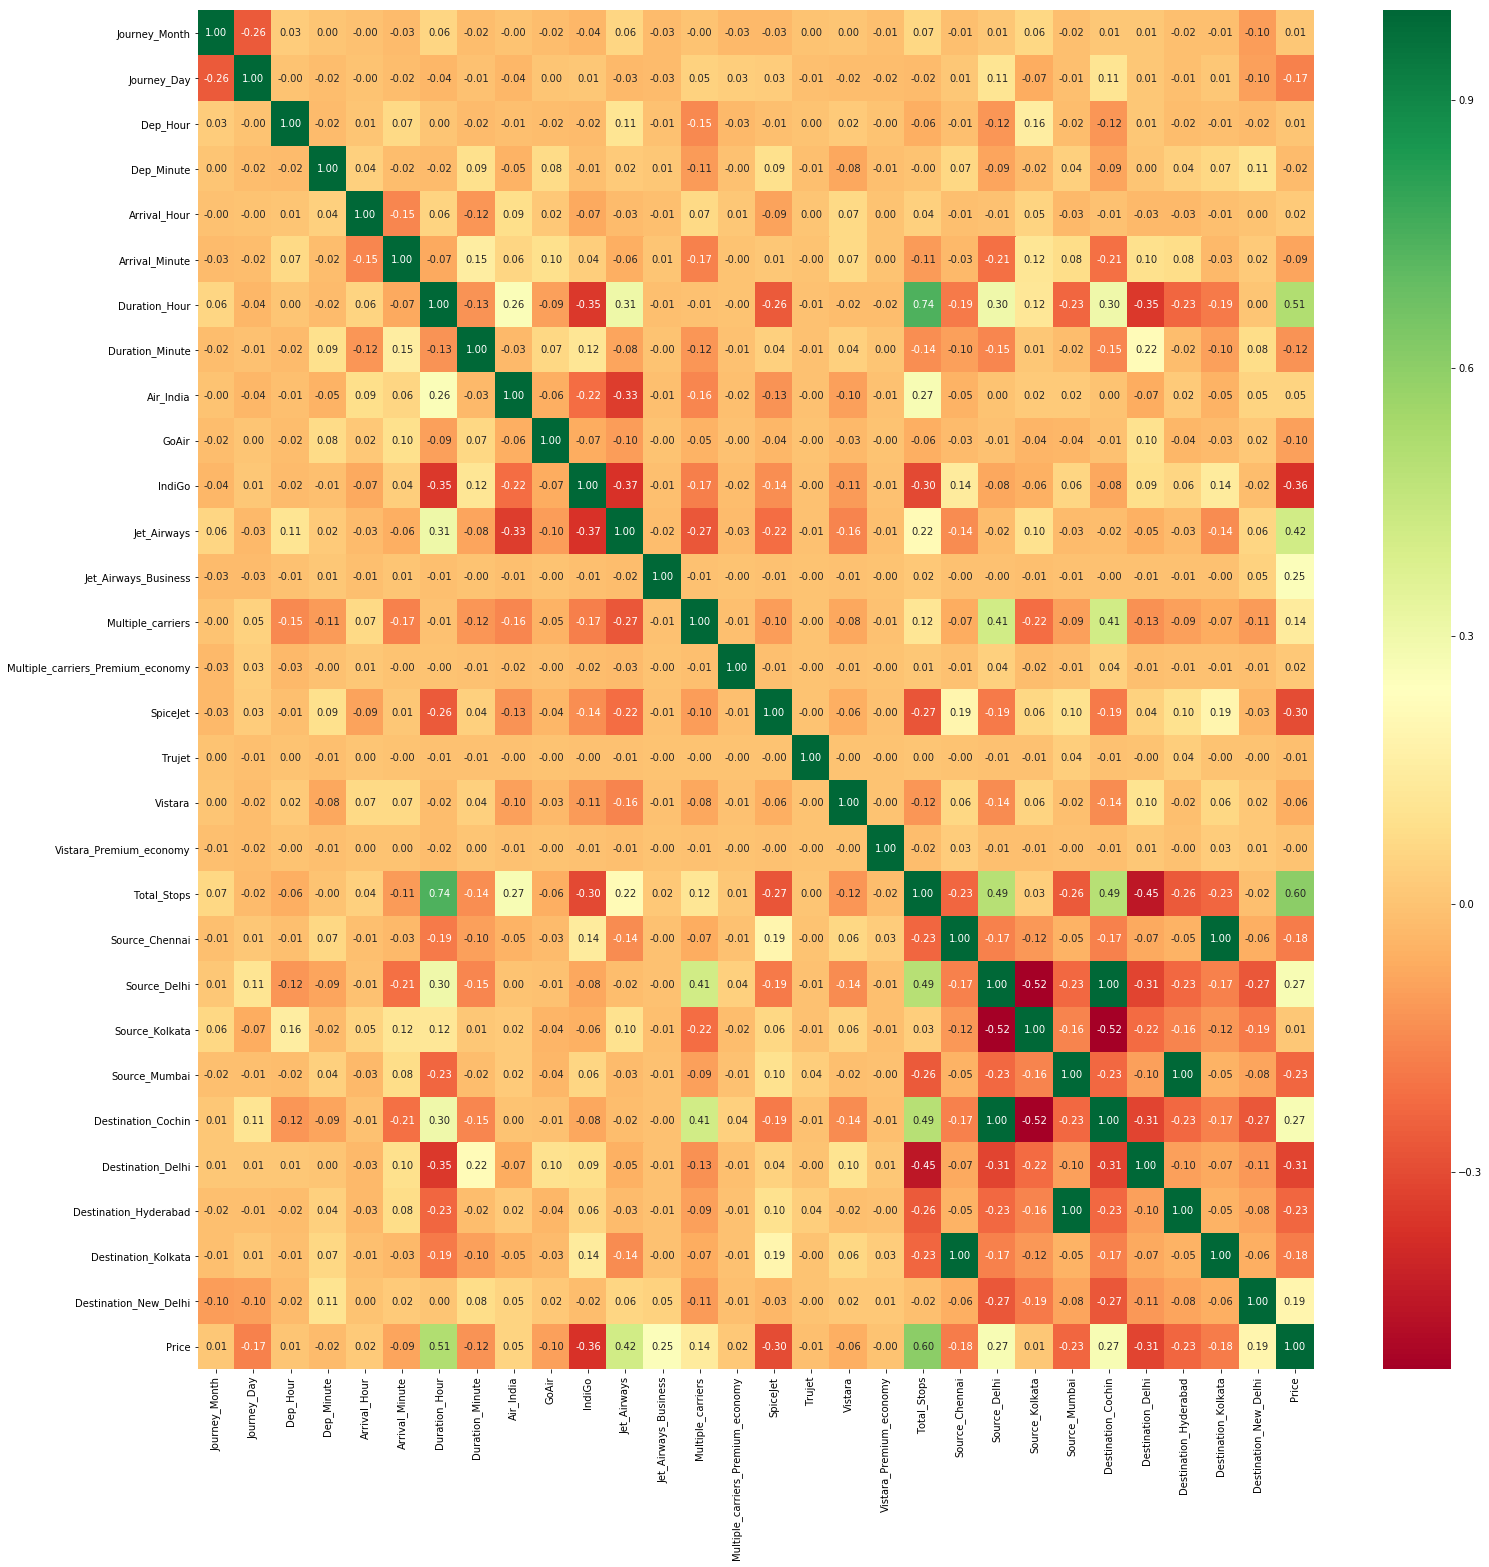

In [82]:
# correlation matrix
plt.figure(figsize=(25,25))
sns.heatmap(data_train.corr(),annot=True,fmt='.2f',cmap='RdYlGn')

In [83]:
data_train.head()

,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air_India,GoAir,IndiGo,Jet_Airways,Jet_Airways_Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy,Total_Stops,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi,Price
0,1,3,9,0,11,30,2,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,5515
1,1,3,0,20,13,20,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,29528
2,1,3,8,55,15,15,6,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,26890
3,1,3,8,50,11,10,26,20,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,19372
4,1,3,10,5,13,0,2,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,10067


In [84]:
x=data_train.iloc[:,:-1]

In [85]:
x.head()

,Journey_Month,Journey_Day,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_Hour,Duration_Minute,Air_India,GoAir,IndiGo,Jet_Airways,Jet_Airways_Business,Multiple_carriers,Multiple_carriers_Premium_economy,SpiceJet,Trujet,Vistara,Vistara_Premium_economy,Total_Stops,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New_Delhi
0,1,3,9,0,11,30,2,30,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,1,3,0,20,13,20,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0
2,1,3,8,55,15,15,6,20,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,3,8,50,11,10,26,20,1,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1
4,1,3,10,5,13,0,2,55,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [86]:
y=data_train["Price"]

In [87]:
y.head()

0     5515
1    29528
2    26890
3    19372
4    10067
Name: Price, dtype: int64

In [88]:
# important features using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
feature_selection=ExtraTreesRegressor()
feature_selection.fit(x,y)

ExtraTreesRegressor()

In [89]:
print(feature_selection.feature_importances_)

[8.63977443e-02 1.07339241e-01 2.45637421e-02 2.21144814e-02
 2.93988474e-02 2.08166918e-02 1.29174398e-01 1.75052339e-02
 9.55550777e-03 1.70072763e-03 1.87802108e-02 1.45566280e-01
 6.75321541e-02 1.82291288e-02 8.90735162e-04 3.68041887e-03
 1.07924820e-04 4.85917132e-03 1.42123233e-04 2.14828563e-01
 5.38755918e-04 1.26406463e-02 3.87298486e-03 6.82867676e-03
 8.21097862e-03 1.39935453e-02 6.45186570e-03 5.69427588e-04
 2.37097937e-02]


In [90]:
selection=pd.Series(feature_selection.feature_importances_,index=x.columns)

In [91]:
selection

Journey_Month                        0.086398
Journey_Day                          0.107339
Dep_Hour                             0.024564
Dep_Minute                           0.022114
Arrival_Hour                         0.029399
Arrival_Minute                       0.020817
Duration_Hour                        0.129174
Duration_Minute                      0.017505
Air_India                            0.009556
GoAir                                0.001701
IndiGo                               0.018780
Jet_Airways                          0.145566
Jet_Airways_Business                 0.067532
Multiple_carriers                    0.018229
Multiple_carriers_Premium_economy    0.000891
SpiceJet                             0.003680
Trujet                               0.000108
Vistara                              0.004859
Vistara_Premium_economy              0.000142
Total_Stops                          0.214829
Source_Chennai                       0.000539
Source_Delhi                      

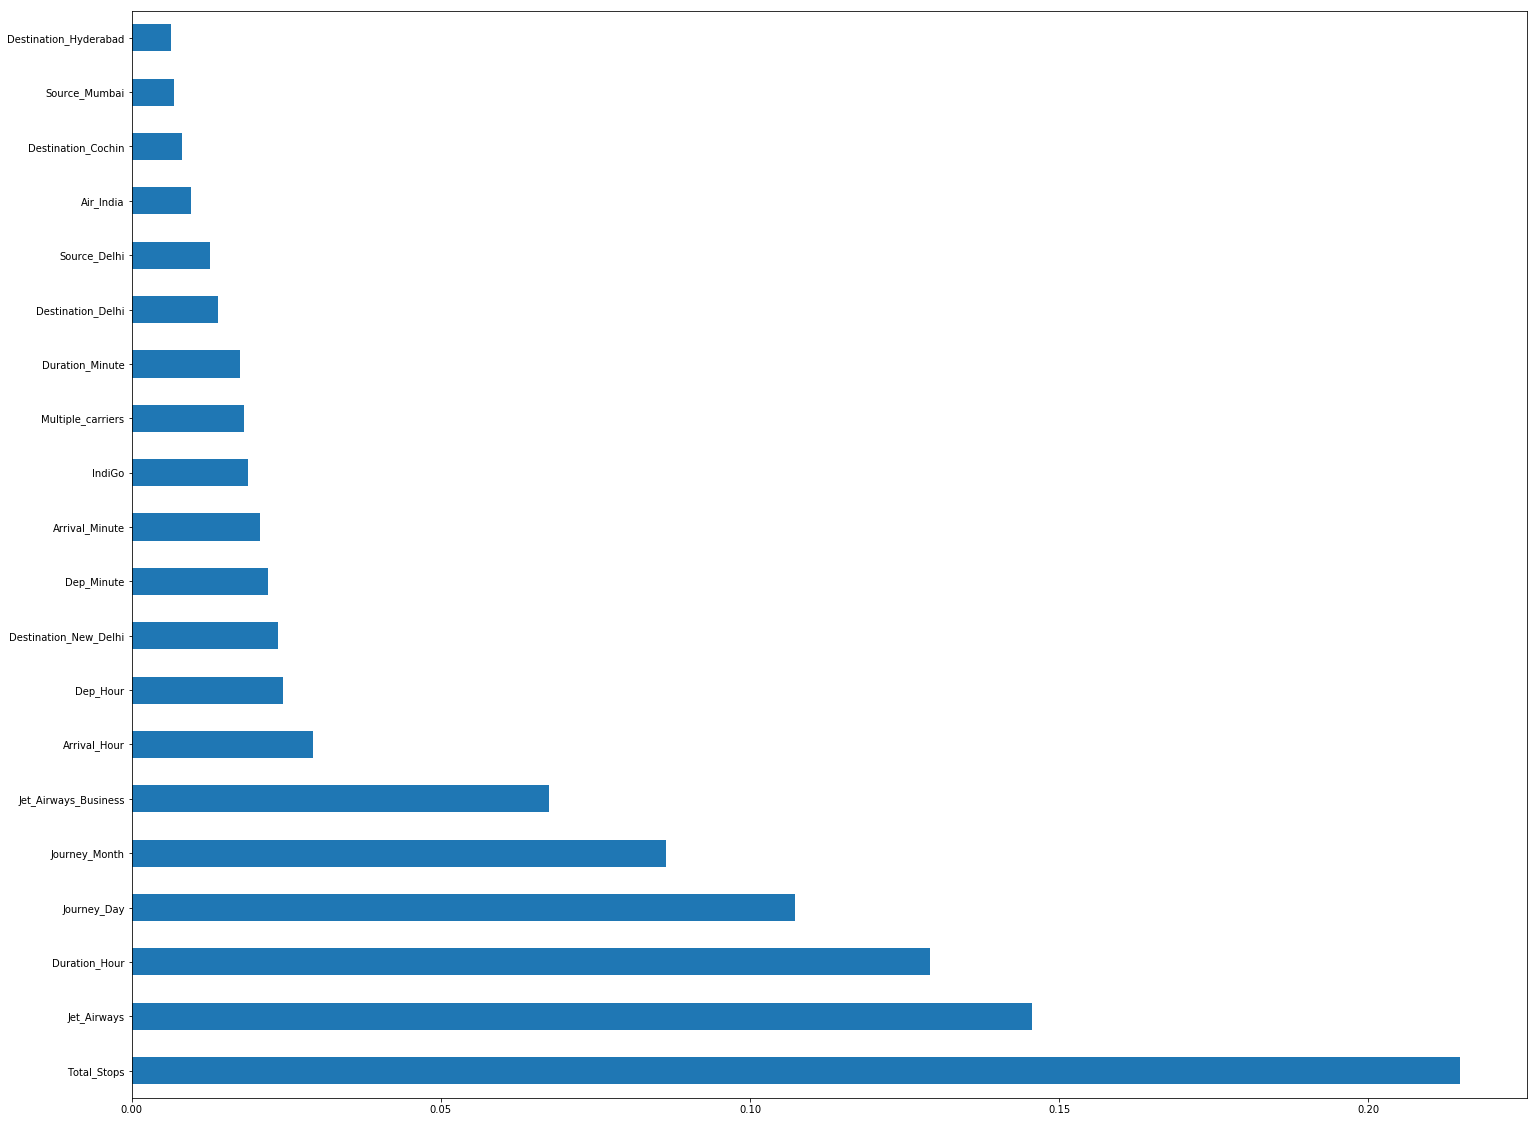

In [92]:
# plot graph for better information
plt.figure(figsize=(25,20))
selection.nlargest(20).plot(kind='barh')

### Fitting Random Forest Regressor Model

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [94]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8545, 29), (2137, 29), (8545,), (2137,))

In [95]:
model=RandomForestRegressor()

In [96]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [97]:
y_preds=model.predict(x_test)

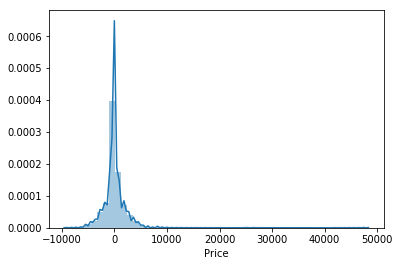

In [98]:
# y_test vs y_preds
sns.distplot(y_test-y_preds)

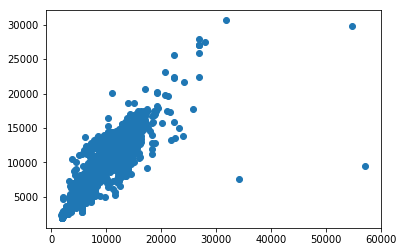

In [99]:
plt.scatter(y_test,y_preds,alpha=1)

In [100]:
#scores
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.9542360564850715
0.761198749800126


In [101]:
from sklearn import metrics
scores={'MSE': metrics.mean_squared_error(y_test,y_preds),
        'MAE': metrics.mean_absolute_error(y_test,y_preds),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test,y_preds))}

In [102]:
scores

{'MSE': 4951092.358029636,
 'MAE': 1207.1968848542012,
 'RMSE': 2225.105021797766}

## Hyperparameter tuning

   **1. RandomizedSearchCV**
   
   **2. GridSearchCV**
   

In [103]:
from sklearn.model_selection import RandomizedSearchCV

In [104]:
random_grid={'n_estimators':[int(x) for x in np.linspace(100,1200,num=12)],
             'max_features':['auto','sqrt'],
             'max_depth'   :[int(x) for x in np.linspace(5,30,num=6)],
             'min_samples_split':[2,5,10,25,35,55,100],
             'min_samples_leaf':[1,2,5,8]
            }

In [105]:
rf_model=RandomizedSearchCV(model,random_grid,cv=5,n_jobs=1,n_iter=10,verbose=2,random_state=42,scoring='neg_mean_squared_error')

In [106]:
rf_model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=55, n_estimators=700; total time=   2.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=55, n_estimators=700; total time=   2.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=55, n_estimators=700; total time=   2.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=55, n_estimators=700; total time=   2.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=55, n_estimators=700; total time=   2.6s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=55, n_estimators=400; total time=   5.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=55, n_estimators=400; total time=   5.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=55, n_estima

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 8],
                                        'min_samples_split': [2, 5, 10, 25, 35,
                                                              55, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [107]:
rf_model.best_params_

{'n_estimators': 900,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 10}

In [108]:
y_preds_new=rf_model.predict(x_test)

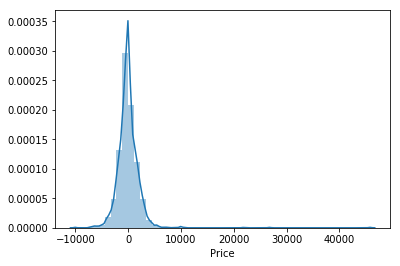

In [109]:
sns.distplot(y_test-y_preds_new)

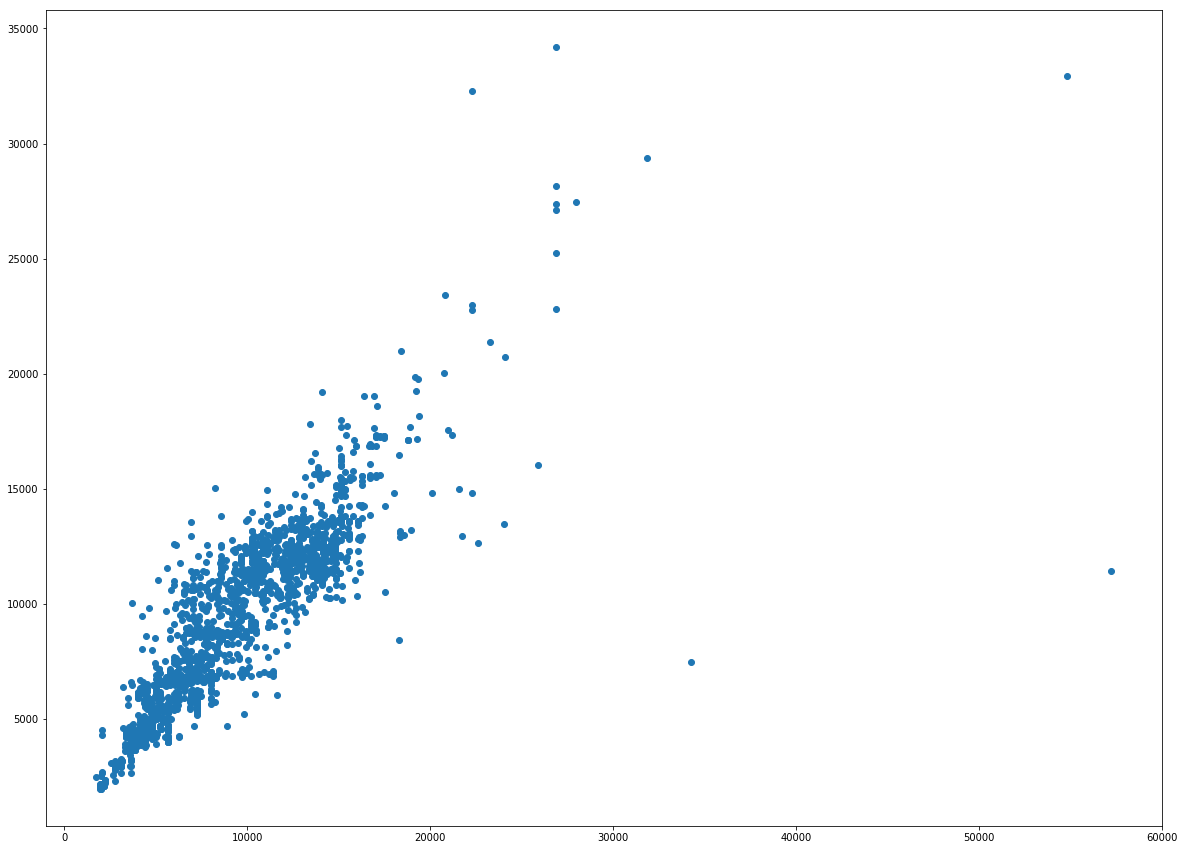

In [110]:
plt.figure(figsize=(20,15))
plt.scatter(y_test,y_preds_new)

In [111]:
# scores
print(rf_model.score(x_train,y_train))
print(rf_model.score(x_test,y_test))

-3138666.4277299484
-4597905.209029407


In [112]:
scores={'MSE': metrics.mean_squared_error(y_test,y_preds_new),
        'MAE': metrics.mean_absolute_error(y_test,y_preds_new),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test,y_preds_new))}

In [113]:
scores

{'MSE': 4597905.209029407,
 'MAE': 1290.5559421618536,
 'RMSE': 2144.272652679553}

## Export Model

In [114]:
import pickle
pickle.dump(rf_model,open('Flight_price_prediction_RF.pkl','wb'))